# Deliverable 2: Project Proposal


# __Introduction__
As one of the most important organs of the human body, a non-functioning heart is one of the leading causes of human death worldwide.
Ischemic heart disease causes 16% of all deaths in the world. Since 2000, this disease has seen the largest increase in the number of deaths, rising by more than 2 million to reach 8.9 million by 2019 (WHO, 2020). 
In this project, we aim to examine a dataset on heart disease, exploring common characteristics that can provide valuable insights into the indicators to watch out for to prevent heart-related ailments.
#### __Research question__
Our study will center around serum cholesterol levels measured in mg/dl, with the objective of addressing the following question:
Is there a significant difference in the proportions of patients diagnosed with heart disease between those with high cholesterol levels and those with normal or below-average cholesterol levels?
(In our study we define >=240mg/dL as high cholesterol levels.)
#### __Choose of parameter__
We will use mean as our location parameter and standard deviation as our scaling parameter.
#### __Dataset description__
We will use the Heart Disease dataset with 14 attributes such as age, sex, cp, trestbps, chol, fbs... based on Cleveland databases. 


<br><br>
#### Table 1: Description of Variables in the Dataset



| Original attribute number | Name    | Description                                              | Range of Values
|-------------------------|---------|----------------------------------------------------------|----------------
| 3                     | age     | -                                                      | -         
| 4                     | sex     | -                                                      | 1 = male
|                       |         | -                                                      | 0 = female        
| 9                     | cp      | chest pain type                                         |1 = typical angina
|                       |         | -                                                      | 2 = atypical angina
|                       |         | -                                                      | 3 = non-anginal pain
|                       |         | -                                                      | 4 = asymptomatic
| 10                    | trestbps| resting blood pressure in mm Hg on admission to the hospital | - 
| 12                    | chol    | serum cholestoral in mg/dl                             | -
| 16                    | fbs     | fasting blood sugar > 120 mg/dl?                        | 1 = true
|                       |         | -                                                      | 0 = false
| 19                    | restecg | resting electrocardiographic results                     | 0 = normal
|                       |         | -                                                      | 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
|                       |         | -                                                      | 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
| 32                    | thalach | maximum heart rate achieved                             | -
| 38                    | exang   | exercise induced angina?                               | 1 = yes
|                       |         | -                                                      | 0 = no
| 40                    | oldpeak | ST depression induced by exercise relative to rest     | -
| 41                    | slope   | the slope of the peak exercise ST segment              | 1 = upsloping
|                       |         | -                                                      | 2 = flat
|                       |         | -                                                      | 3 = downsloping
| 44                    | ca      | number of major vessels                                | 0-3, colored by flourosopy
| 51                    | thal    | -                                                      | 3 = normal
|                       |         | -                                                      | 6 = fixed defect
|                       |         | -                                                      | 7 = reversable defect
| 58                    | num     | diagnosis of heart disease (angiographic disease status) (the predicted attribute) | 0 = < 50% diameter narrowing
|                       |         | -                                                      | 1 = > 50% diameter narrowing


# Preliminary Results


1. Demonstrate that the dataset can be read from the web into R.
2. Clean and wrangle your data into a tidy format.
3. Plot the relevant raw data, tailoring your plot in a way that addresses your question.
4. Compute estimates of the parameter you identified across your groups. 
5. Present this in a table. If relevant, include these estimates in your plot.

In [2]:
# import libraries
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
library(broom)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ lubridate::stamp() masks cowplot::stamp()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
# STEP 1: Read the data from the web 
data <- read.table("https://raw.githubusercontent.com/Kaylan-W/STAT-201-Final-Project/main/data/processed.cleveland.data", 
                   sep = ",", header = FALSE, na.strings = "?")
 
# Assign column names to the dataframe
colnames(data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")


# STEP 2: Clean and wrangle data
# Tidy target column by combining values to make a binary feature
mutate_num <- data %>%
    mutate(diagnosis = case_when(num == 0 ~ "absence",
                                 num == 1 ~ "presence",
                                 num == 2 ~ "presence",
                                 num == 3 ~ "presence",
                                 num == 4 ~ "presence"))

# If chol is greater than this value, it is classified as high cholesterol 
threshold = 250

# Turn chol into a categorical variable with the categories "High Chol" and "Normal/Below-Avg Chol"
mutate_chol <- mutate_num %>%
    mutate(chol_level = case_when(chol >  threshold ~ "High",
                                  chol <= threshold ~ "Normal/Below-Avg "))


# Select relevant columns and handle NA values. 
data_downsized<- mutate_chol %>%
        select(age, chol, chol_level, diagnosis, -num) %>%
        na.omit()

# head(data_downsized)

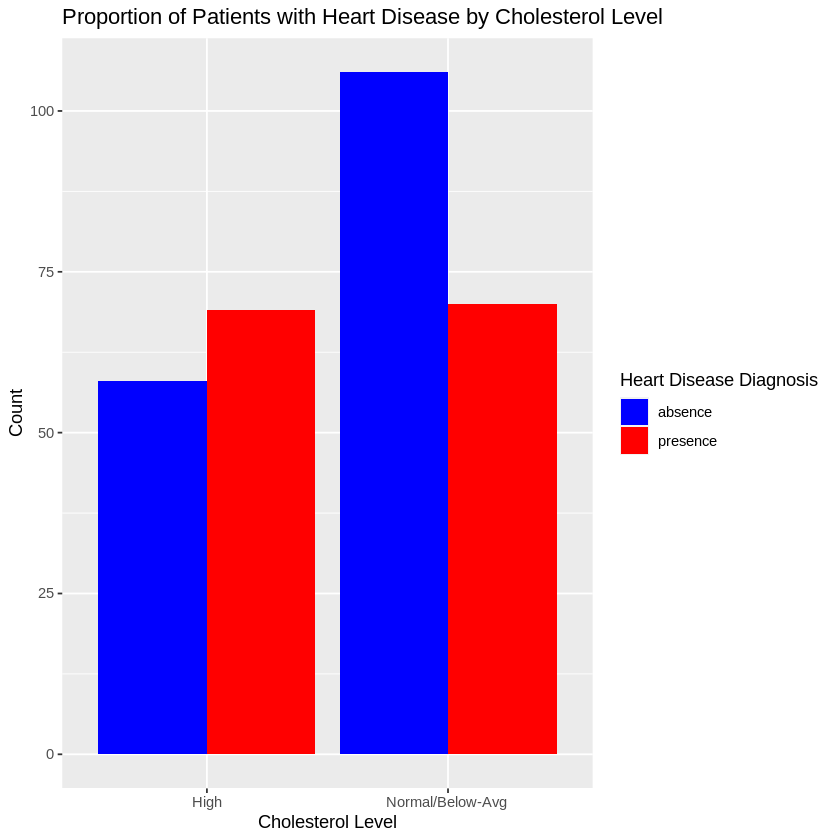

In [5]:
# STEP 3: Create a bar chart
ggplot(data_downsized, aes(x = chol_level, fill = diagnosis)) +
  geom_bar(position = "dodge") +
  labs(title = "Proportion of Patients with Heart Disease by Cholesterol Level",
       x = "Cholesterol Level",
       y = "Count",
       fill = "Heart Disease Diagnosis") +
  scale_fill_manual(values = c("absence" = "blue", "presence" = "red"))

chol_level,disease_count,n,proportion,mean_chol,median_chol,sd_chol,var_chol
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
High,69,127,0.5433071,293.4331,283,41.13655,1692.2157
Normal/Below-Avg,70,176,0.3977273,212.9659,216,26.04894,678.5474


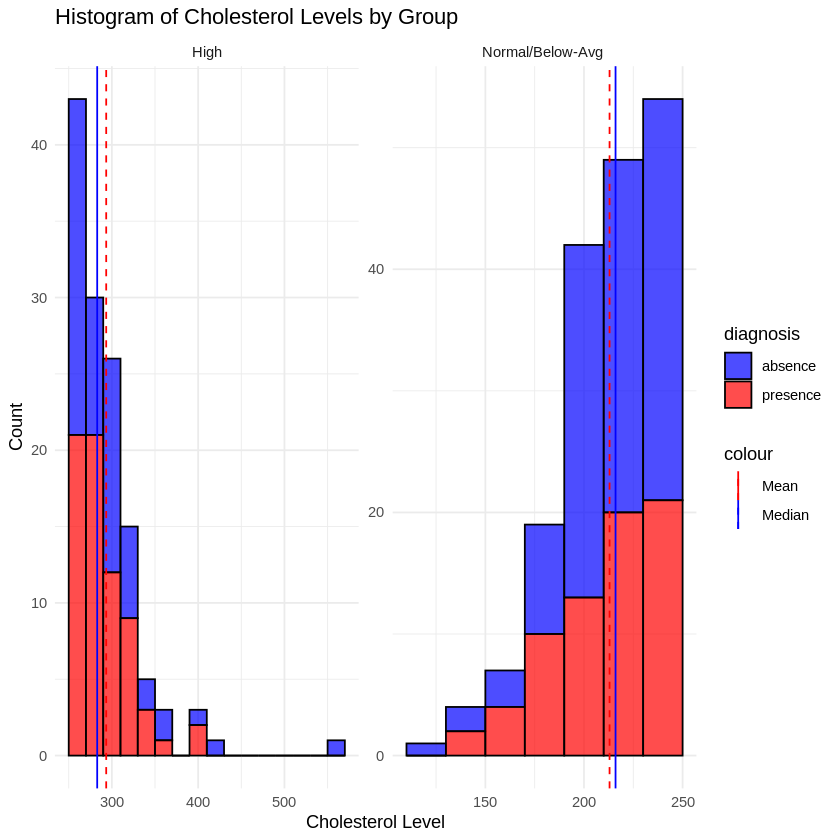

In [6]:
#STEP 4: Compute estimates of the parameter you identified across your groups.

prop_diagnosis_by_chol <- data_downsized %>%
  group_by(chol_level) %>%
  summarise(disease_count = sum(diagnosis == "presence"),
            n = n(),
            proportion = disease_count / n,
            mean_chol = mean(chol, na.rm = TRUE),
            median_chol = median(chol, na.rm = TRUE),
            sd_chol = sd(chol, na.rm = TRUE),
            var_chol = var(chol, na.rm = TRUE))


#STEP 5: Present this in a table. If relevant, include these estimates in your plot.

prop_diagnosis_by_chol

ggplot(data_downsized, aes(x = chol, fill = diagnosis)) +
  geom_histogram(binwidth = 20, color = "black", alpha = 0.7) +
  geom_vline(data = prop_diagnosis_by_chol, aes(xintercept = mean_chol, color = "Mean"), linetype="dashed") +
  geom_vline(data = prop_diagnosis_by_chol, aes(xintercept = median_chol, color = "Median"), linetype="solid") +
  labs(title = "Histogram of Cholesterol Levels by Group",
       x = "Cholesterol Level",
       y = "Count") +
  scale_color_manual(values = c("Mean" = "red", "Median" = "blue","Sqrt(Variance)" = "purple")) +
  scale_fill_manual(values = c("absence" = "blue", "presence" = "red")) +
  facet_wrap(~ chol_level, scales = "free") +
  theme_minimal()

# Methods: Plan

In this report, our group is trying to investigate heart disease deeply. The dataset we will use comes from the UC Irvine Machine Learning Repository, created by famous Cardiologists with more than 300 samples. The dataset has been used for more than 60 citations, viewed more than 300,000 times, and more than 30 years published in the American Journal of Cardiology; therefore, we could conclude the dataset we are using is authentic, authoritative, confident, and generalizability which can demonstrate the actual population in our real life.

The provided plots and estimates give a basic overview about the data but lack the context and guidance necessary to fully understand the data. We can bridge the gap by providing confidence intervals to help stakeholders to understand the degree of uncertainty associated with the estimates. It will also gives a clearer picture of where the true value of the population parameter might lie, which is crucial for making decisions.

### Confidence Interval

We set the confidence interval to 90% confidence. The variable we focus on in this data set is `chol`, which represents the cholesterol level in humans. We take a random sample of size 30 from `data` and use `rep_sample_n` and a seed of 0120. And the resulting data frame will only contain the column: `chol`.

In [13]:
set.seed(0120)

sample_2 <- data %>%
rep_sample_n(reps = 1, size = 30, replace = FALSE) %>%
ungroup() %>%
select(chol)
head(sample_2)

chol
<dbl>
325
185
233
175
284
342


After, we generate a bootstrap distribution of sample means from `sample_2` by re-sampling with replacement 1000 times using `rep_sample_n` and a seed of 5127. Then, calculate the mean of each bootstrap sample. Name the new column containing the bootstrap sample means `mean_cholesterol`, and select only that column.

In [14]:
set.seed(5127)

bootstrap_dist <- sample_2 %>%
rep_sample_n(reps =1000, size = 30, replace = TRUE) %>%
group_by(replicate) %>%
summarize(mean_cholesterol = mean(chol)) %>%
select(mean_cholesterol)
head(bootstrap_dist)

mean_cholesterol
<dbl>
222.2667
239.9000
252.2667
251.1333
228.9333
232.9333


At this step, we calculate the 5th and 95th percentiles of `bootstrap_dist` using the `quantile` and `summarize` functions. Name the column containing the 5th percentile `ci_lower` and the column containing the 95th percentile `ci_upper`.

In [15]:
ci <- bootstrap_dist %>%
summarize(ci_lower = quantile(mean_cholesterol, 0.05),
          ci_upper = quantile(mean_cholesterol, 0.95))
head(ci)

ci_lower,ci_upper
<dbl>,<dbl>
227.2967,254.7067


From the table, the lower confidence interval is 227.2967, and the upper confidence interval is 254.7067; we can conclude both are reasonable values.

### Hypothesis Test

We plan to have two hypothesis tests for our project, which are the null hypothesis and the alternative hypothesis.

Null Hypothesis ($H_0$): There is no significant difference in the proportions of patients diagnosed with heart disease between those with high cholesterol levels and those with normal or below-average cholesterol levels.

$H_0$: $\mu_1$ - $\mu_2$ = $0$

Alternative Hypothesis ($H_1$): There is a significant difference in the proportions of patients diagnosed with heart disease between those with high cholesterol levels and those with normal or below-average cholesterol levels.

$H_1$: $\mu_1$ - $\mu_2$ $\neq$ 0

For this report, we expect to reach out to the significant difference in the proportions of those patients diagnosed with heart disease between the patients with high cholesterol levels and regular patients or their cholesterol levels are at normal range. We will use different types of plots for the visualization, null hypothesis test, and alternative hypothesis test and also apply the bootstrapping and asymptotic method we learned from the Statistics course to get to the answer we would like to know.

We believe our findings will demonstrate huge influences not only in society but also in the medical field. After those analyses, the report will become robust and powerful evidence to show if the patients with higher cholesterol levels may have more risks of heart disease than those with lower cholesterol levels. If so, the citizens may start to focus on their cholesterol levels, and it will help to reduce the number of heart disease cases every year. 

After the research, we may have some future questions to consider, such as: 

- Is high cholesterol level the only reason to cause heart disease? 
- Are there any other factors that will lead to heart disease? 
- Does an older person have more chance of having heart disease than those younger?

#### Citation for dataset:

- Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository: https://doi.org/10.24432/C52P4X
- Information about the dataset creator: https://esc365.escardio.org/person/16901